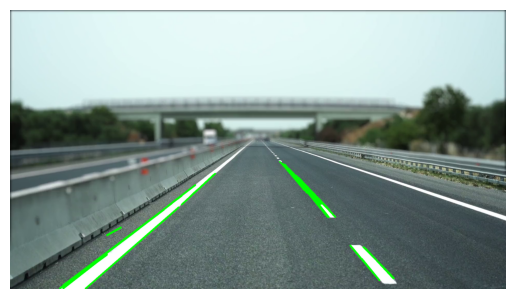

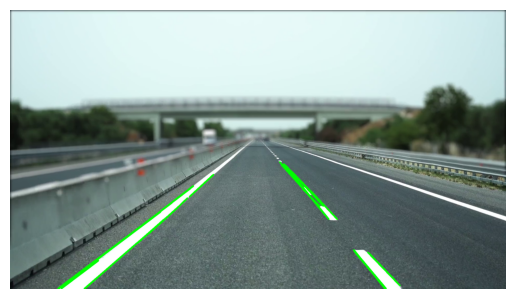

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Define a function to detect lanes in each frame
def detect_lanes(frame, focus=True):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blur_image = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur_image, 50, 150)

    # Create a region of interest (ROI) mask
    mask = np.zeros_like(edges)
    height, width = frame.shape[:2]
    #Selecting a triangular view as the region of interest to follow the tracks precisely
    if focus:
        vertices = np.array([[(0, height), (width / 2, (height/2)), (width, height)]], dtype=np.int32)
        cv2.fillPoly(mask, vertices, 255)
        masked_edges = cv2.bitwise_and(edges, mask)
    else:
        masked_edges = edges

    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(masked_edges, 2, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=50)

    # Draw detected lines on a copy of the frame
    result = np.copy(frame)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 5)

    return result

In [ ]:
# Open the video file
input_video = cv2.VideoCapture('/content/road_-_80400 (1080p).mp4')  # Replace with your video file
output_video = cv2.VideoWriter('/content/output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 24, (int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(input_video.get( cv2.CAP_PROP_FRAME_HEIGHT))))

i = 1
while input_video.isOpened():
    ret, frame = input_video.read()
    if not ret:
        break

    # Process the frame and detect lanes
    result_frame = detect_lanes(frame)
    # Write the processed frame to the output video
    output_video.write(result_frame)
    # Display the frame using Matplotlib
    if i < 3:
        plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        i += 1

input_video.release()
output_video.release()
cv2.destroyAllWindows()

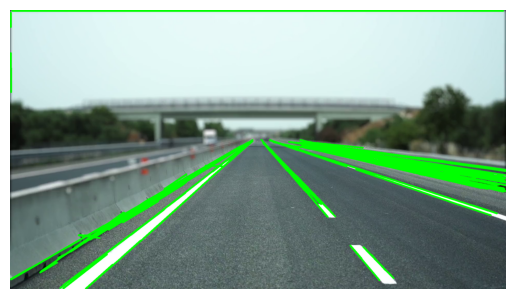

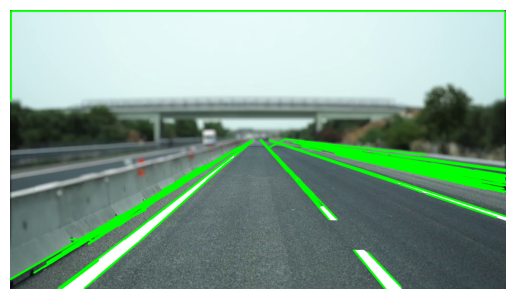

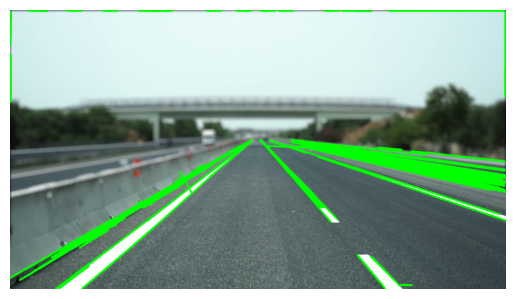

In [13]:
#This second one is the lane detection without choosing a region of interest.
input_video = cv2.VideoCapture('/content/road_-_80400 (1080p).mp4')  # Replace with your video file
output_video = cv2.VideoWriter('/content/output_video_full.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 24, (int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(input_video.get( cv2.CAP_PROP_FRAME_HEIGHT))))
i = 0
while input_video.isOpened():
    ret, frame = input_video.read()
    if not ret:
        break

    # Process the frame and detect lanes
    result_frame = detect_lanes(frame, focus=False)
    # Write the processed frame to the output video
    output_video.write(result_frame)
    if i < 3:
        plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        i += 1


input_video.release()
output_video.release()
cv2.destroyAllWindows()
